<h1> House Price Prediction 

<b>Dataset</b>: <a  href= https://archive.ics.uci.edu/ml/datasets/Housing>  Boston Housing dataset  </a> 

Obs: Here we are importing this dataset from the scikit-learn.

Contains information about various houses in Boston through different parameters. 
506 samples and 13 feature variables. 

<b>Goal</b>: to predict the value of prices of the house using the given features.

Linear Regression approach.  

@author: Mariana R. Barros

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
#Loading data
from sklearn.datasets import load_boston
from pandas import DataFrame
boston = load_boston()
#boston.data
#boston.feature_names
#boston.target

In [47]:
# adding all the features to data frame
temp = DataFrame(boston.data,columns=pd.Index(boston.feature_names))
df = temp.join(DataFrame(boston.target, columns=["PRICE"]))
df # final data in dataframe formate

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [48]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [49]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [50]:
#boston.DESCR

<h2>Exploratory Data Analysis

In [51]:
# Basic statistics for all continuous variables
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


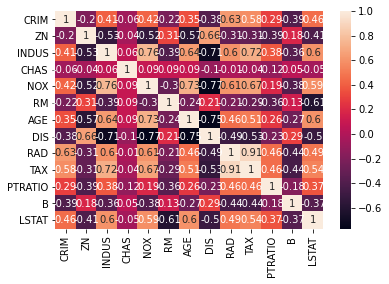

In [52]:
#Correlation matrix (linear relationships between the variables)
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

<h3>Data Visualization

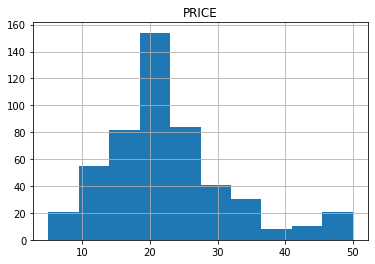

In [53]:
#Distribution of the target variable (price)
viz = df[['PRICE']]
viz.hist()
plt.show()

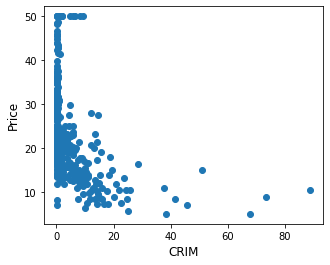

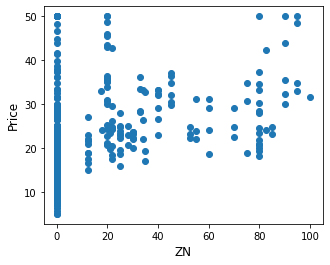

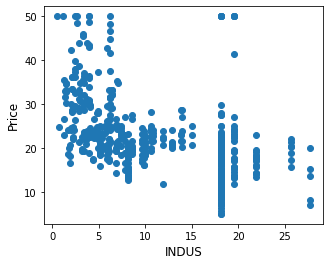

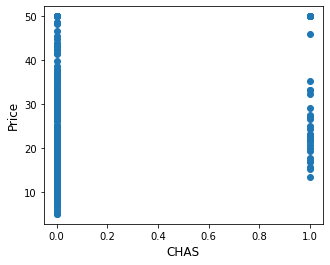

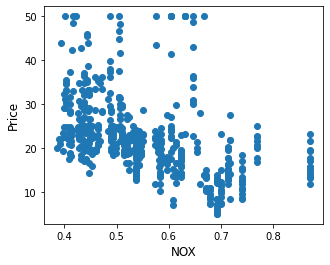

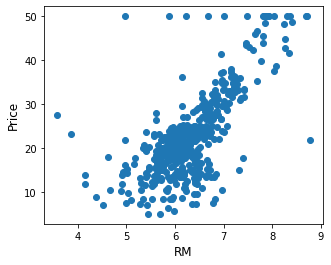

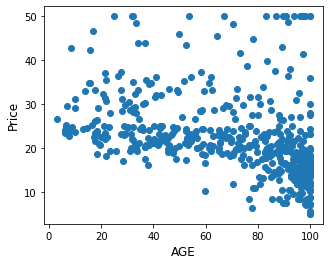

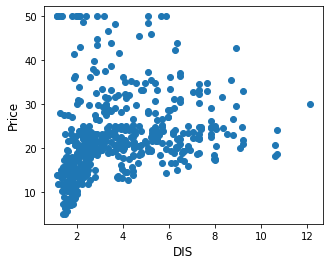

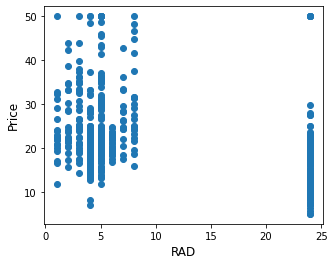

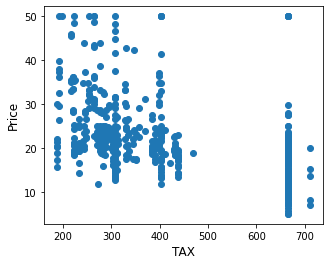

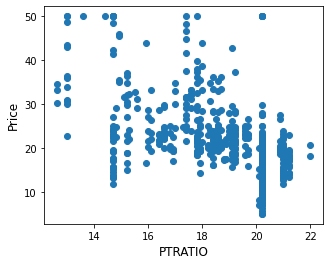

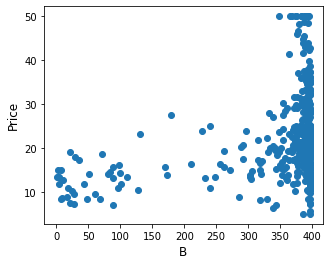

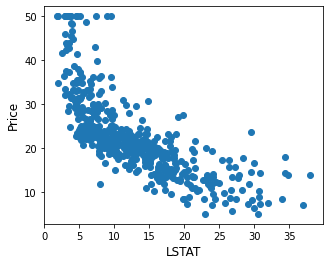

In [54]:
#Finding out the form of relation between variables and the price (target)
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

(0.0, 52.787898320718796)

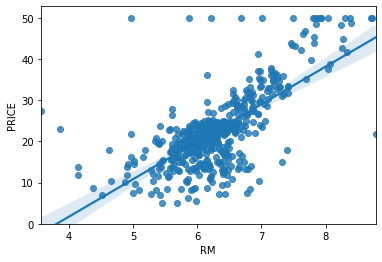

In [55]:
import seaborn as sns
sns.regplot(x="RM", y="PRICE", data=df)
plt.ylim(0,)

In [56]:
df[["RM", "PRICE"]].corr()

,RM,PRICE
RM,1.00000,0.69536
PRICE,0.69536,1.00000


(0.0, 52.69718026455102)

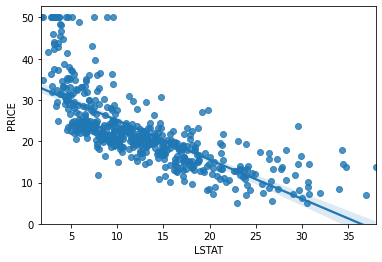

In [57]:
sns.regplot(x="LSTAT", y="PRICE", data=df)
plt.ylim(0,)

In [58]:
df[["LSTAT", "PRICE"]].corr()

,LSTAT,PRICE
LSTAT,1.000000,-0.737663
PRICE,-0.737663,1.000000


<h3>Simple Regression Model</h3>

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Creating train and test dataset

In [60]:
df_x=df[["RM"]]
df_y = df[["PRICE"]]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=5)

#### Train data distribution

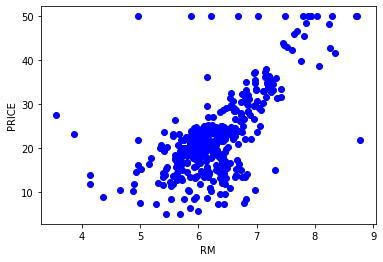

In [61]:
plt.scatter(x_train, y_train,  color='blue')
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.show()

#### Modeling


In [62]:
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.18073163]]
Intercept:  [-35.33131922]


#### Plot outputs

Text(0.5, 1.0, 'Train data')

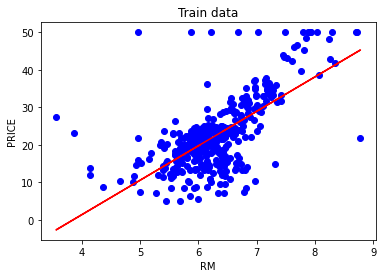

In [63]:
plt.scatter(x_train, y_train,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.title("Train data")

#### Evaluation

    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [71]:
y_predict = regr.predict(test_x)

r2 = round(regr.score(x_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
R2 score is 0.43




<h3> Multiple variables regression

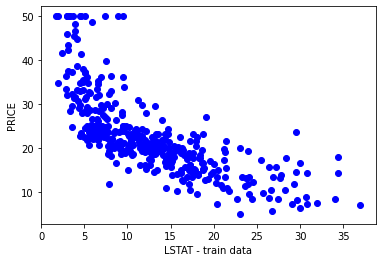

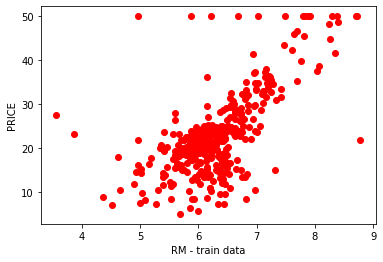

Coefficients:  [[ 4.75097012 -0.66688564]]
Residual sum of squares: 23.45
Variance score: 0.72


In [72]:
#Performing the Linear Regression for both variables "RM" and "LSTAT"
msk2 = np.random.rand(len(df)) < 0.8
train2 = df[msk]
test2 = df[~msk]

#train test plots
plt.scatter(train2.LSTAT, train2.PRICE,  color='blue')
plt.xlabel("LSTAT - train data")
plt.ylabel("PRICE")
plt.show()

plt.scatter(train2.RM, train2.PRICE,  color='red')
plt.xlabel("RM - train data")
plt.ylabel("PRICE")
plt.show()

#modeling
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
x2 = np.asanyarray(train2[['RM','LSTAT']])
y2 = np.asanyarray(train2[['PRICE']])
regr.fit (x2, y2)
# The coefficients
print ('Coefficients: ', regr.coef_)


#prediction
y_hat2= regr.predict(test2[['RM','LSTAT']])
x2 = np.asanyarray(test2[['RM','LSTAT']])
y2 = np.asanyarray(test2[['PRICE']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat2 - y2) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x2, y2))